## 微分散乱断面積のグラフ
### パッケージ

In [262]:
using Plots
using LaTeXStrings

### 定数定義

In [263]:
const hbar = 1.054571817e-34 # 換算Planck定数[J s]
const e = 1.602176634e-19 # 電気素量[C]
const epsilon = 8.8541878128e-12 # 真空の誘電率[F/m]
const Z = 6 # 炭素の原子番号
const N_A = 6.02214076e23 # アボガドロ定数[/mol]
alpha = Z^2 * e^2 / (4pi * epsilon) # [J m]
m_C12 = 12.0e-3 / N_A # C12の質量[kg]
m_C13 = 13.0e-3 / N_A # C13の質量[kg] 

2.1587007873260005e-26

$$
\alpha\colon =\frac{Z^{2}e^{2}}{4\pi\epsilon_{0}}
$$

### 換算関数
- `MeV_to_J`は$\mathrm{MeV}$単位のエネルギーを$\mathrm{J}$単位に変換する関数

In [264]:
MeV_to_J(E) = E * 1.0e6 * e

MeV_to_J (generic function with 1 method)

### Rutherford散乱
$$
\sigma_{\text{Lutherford}}\left(\theta\right)\colon =\left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\sin^{-4}\frac{\theta}{2}
$$
- 異種粒子のCoulomb散乱
- `sigma1213`は$^{12}\text{C-}^{13}\text{C}$散乱の微分散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [265]:
function sigma1213(theta,E_CM)
    (alpha / (4 * E_CM))^2 * sin(theta / 2)^(-4)
end

sigma1213 (generic function with 1 method)

### Mott散乱
$$
\begin{align*}
\sigma_{\text{Mott}}\left(\theta\right)\colon 
&= \left|f\left(\theta\right)\right|^{2}+\left|f\left(\pi -\theta\right)\right|^{2}-\frac{1}{2}\left[f^{\ast}\left(\theta\right)f\left(\pi -\theta\right)+f\left(\theta\right)f^{\ast}\left(\pi -\theta\right)\right]\\
&= \left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\left[\sin^{-4}\frac{\theta}{2}+\cos^{-4}\frac{\theta}{2}-\sin^{-2}\frac{\theta}{2}\cos^{-2}\frac{\theta}{2}\cos\left(\frac{\alpha}{\hbar v}\log\left(\tan^{2}\frac{\theta}{2}\right)\right)\right]
\end{align*}\\
E_{\text{CM}}=\frac{1}{2}\mu v^{2},\quad\mu\colon =\frac{m_{1}m_{2}}{m_{1}+m_{2}}\stackrel{m_{1}=m_{2}=m}{=}\frac{m}{2}
$$
- spin$\frac{1}{2}$の同種fermionの散乱
- `sigma1313`は$^{13}\text{C-}^{13}\text{C}$散乱の散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [266]:
function sigma1313(theta,E_CM)
    x = theta / 2
    s = sin(x)
    c = cos(x)
    t = tan(x)
    v = 2 * sqrt(E_CM / m_C13)
    (alpha / (4 * E_CM))^2 * (s^(-4) + c^(-4) - s^(-2) * c^(-2) * cos(log(t^2) * alpha / (hbar * v)))
end

sigma1313 (generic function with 1 method)

### 同種bosonのCoulomb散乱
$$
\begin{align*}
\sigma_{\text{bosons}}\left(\theta\right)\colon
&= \left|f\left(\theta\right)+f\left(\pi -\theta\right)\right|^{2}\\
&= \left|f\left(\theta\right)\right|^{2}+\left|f\left(\pi -\theta\right)\right|^{2}+f^{\ast}\left(\theta\right)f\left(\pi -\theta\right)+f\left(\theta\right)f^{\ast}\left(\pi -\theta\right)\\
&= \left(\frac{\alpha}{4E_{\text{CM}}}\right)^{2}\left[\sin^{-4}\frac{\theta}{2}+\cos^{-4}\frac{\theta}{2}+2\sin^{-2}\frac{\theta}{2}\cos^{-2}\frac{\theta}{2}\cos\left(\frac{\alpha}{\hbar v}\log\left(\tan^{2}\frac{\theta}{2}\right)\right)\right]
\end{align*}\\
E_{\text{CM}}=\frac{1}{2}\mu v^{2},\quad\mu\colon =\frac{m_{1}m_{2}}{m_{1}+m_{2}}\stackrel{m_{1}=m_{2}=m}{=}\frac{m}{2}
$$
- spin$0$の同種bosonの散乱
- `sigma1212`は$^{12}\text{C-}^{12}\text{C}$散乱の散乱断面積を計算する関数
    - 単位は$\mathrm{m}^{-2}$
    - `\theta`の単位は$\mathrm{rad}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$

In [267]:
function sigma1212(theta,E_CM)
    x = theta / 2
    s = sin(x)
    c = cos(x)
    t = tan(x)
    v = 2 * sqrt(E_CM / m_C12)
    (alpha / (4 * E_CM))^2 * (s^(-4) + c^(-4) + 2 * s^(-2) * c^(-2) * cos(log(t^2) * alpha / (hbar * v)))
end

sigma1212 (generic function with 1 method)

### グラフの出力
- `plot_sigma`は$\text{C-C}$散乱の微分断面積のグラフを描画する関数
    - 横軸$\theta$の単位は度, 縦軸$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}$の単位は$\mathrm{barn}$
    - `E_CM`は重心系における運動エネルギーで単位は$\mathrm{J}$
    - `nuclide1`, `nuclide2`には炭素の核種の原子量(12or13)をInt型で入れる
    - `range`には$\theta$の範囲を度数法で入れる

In [270]:
function plot_sigma(E_CM,nuclide1::Int,nuclide2::Int,range::Tuple{Real,Real})
    n1 = nuclide1
    n2 = nuclide2
    plot(theta->1.0e28 * begin
            if n1 == 12 && n2 == 12
                sigma1212(theta*pi/180,E_CM)
                elseif n1 == 13 && n2 == 13
                sigma1313(theta*pi/180,E_CM)
                elseif n1 + n2 == 12+13 && n1 * n2 == 12*13
                sigma1213(theta*pi/180,E_CM)
            else
                0
            end
            end,
        xlabel = L"\theta^{\circ}",
        ylabel = L"\sigma\left[\mathrm{barn}\right]",
        label = L"^{%$n1}\mathrm{C-}^{%$n2}\mathrm{C}",
        xlims = range,
        )
end

plot_sigma (generic function with 1 method)

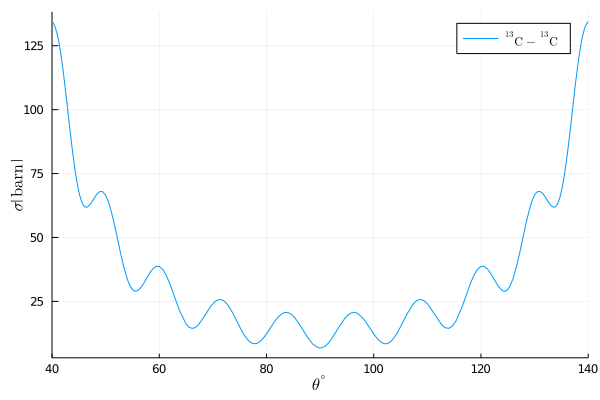

In [271]:
plot_sigma(MeV_to_J(1.0),13,13,(40,140))

### 実験室系と重心系の換算
$$
\begin{gather*}
    \sigma^{\ast}\left( \theta^{\ast} \right) =\frac{\mathrm{d}\theta}{\mathrm{d}\theta^{\ast}}\frac{\sin\theta}{\sin\theta^{\ast}}\sigma\left( \theta \right)\\
    \frac{\mathrm{d}\theta}{\mathrm{d}\theta^{\ast}}=\frac{\frac{\cos\theta^{\ast}}{n}+1}{\left( \cos\theta^{\ast} + \frac{1}{n} \right)^{2}}\cos^{2}\theta\\
    \theta^{\ast} = \pi -2\theta_{b} = \pi -2\arccos \left(\frac{1+n}{2\sqrt{n}}\sqrt{1-\frac{T_{a}^{\prime}}{T_{a}}} \right)\\
    \cos^{2}\theta_{b}=\left( 1-\frac{T_{a}^{\prime}}{T_{a}} \right) \frac{\left( 1+n \right)^{2}}{4n}\\
    \frac{T_{a}^{\prime}}{T_{a}}=\frac{n^{2}+\cos 2\theta +2\cos\theta\sqrt{n^2 - \sin^{2}\theta}}{\left( 1+n \right)^{2}}
\end{gather*}
$$
- $\ast$付きの記号は重心系での物理量を表す

In [272]:
function energy_ratio(n,theta)
    (n^2 + cos(2 * theta) + 2 * cos(theta) * sqrt(n^2 - (sin(theta))^2))/(1+n)^2
end

energy_ratio (generic function with 1 method)

In [273]:
function cos_square_another(n,theta)
    (1 - energy_ratio(n,theta)) * (1 + n)^2 / (4 * n)
end

cos_square_another (generic function with 1 method)

In [274]:
function theta_CM(n,theta)
    pi - 2 * acos(sqrt(cos_square_another(n,theta)))
end

theta_CM (generic function with 1 method)

In [275]:
function dtheta_over_dtheta_CM(n,theta)
    cos_theta_CM = cos(theta_CM(n,theta))
    (1 + cos_theta_CM / n) * cos(theta)^2 / (cos_theta_CM + 1 / n)^2
end

dtheta_over_dtheta_CM (generic function with 1 method)

In [276]:
function cross_section_CM(n,theta,cross_section_Lab)
    sin_theta_CM = sin(theta_CM(n,theta))
    cross_section_Lab * dtheta_over_dtheta_CM(n,theta) * sin(theta) / sin_theta_CM
end

cross_section_CM (generic function with 1 method)

### 測定値から実験室系の散乱断面積を求める
- 測定値: $\frac{\Delta N}{N}$, $\theta_{\text{measured}}$
- 既知量: $R$, $\rho$, $\theta_{0}$, $\Delta S$
$$
\begin{gather*}
    \sigma\left(\theta\right) = \frac{\Delta N}{N}\frac{r^{2}}{\Delta S}\\
    r = \sqrt{R^{2}+\rho^{2}-2R\rho\cos\left(\theta_{\text{measured}}+\theta_{0}\right)}\\
    \theta = \arccos\frac{r^{2}+r_{0}^{2}-2R^{2}\left( 1-\cos\theta_{\text{measured}} \right)}{2rr_{0}}\\
    r_{0} = \sqrt{R^{2}+\rho^{2}-2R\rho\cos\theta_{0}}
\end{gather*}
$$

In [277]:
R = 63.6963 # [mm]
rho = 2.6670 # [mm]
theta0 = 160.48 * pi / 180 # [rad]
deltaS = 0.869 # [mm^2]

0.869

In [278]:
function theta_corr(theta) # [rad]
    r = sqrt(R^2 + rho^2 - 2 * R * rho * cos(theta + theta0))
    r0 = sqrt(R^2 + rho^2 - 2 * R * rho * cos(theta0))
    acos((r^2 + r0^2 - 2 * R^2 * (1 - cos(theta))) / (2 * r * r0))
end

theta_corr (generic function with 1 method)

In [279]:
function cross_section_Lab(deltaN_over_N,theta)
    r = sqrt(R^2 + rho^2 - 2 * R * rho * cos(theta + theta0))
    (deltaN_over_N) * (r^2 / deltaS)
end

cross_section_Lab (generic function with 2 methods)

In [280]:
function cross_section(nuclide1,nuclide2,theta,deltaN_over_N) # [mm^2]
    cross_section_CM(nuclide1/nuclide2,theta,cross_section_Lab(deltaN_over_N,theta))
end

cross_section (generic function with 2 methods)

### 実験値のプロット
- 角度, 散乱断面積ともに重心系での値

In [305]:
function plot_exp(nuclide1,nuclide2,theta_and_deltaN_over_N_array)
    data = theta_and_deltaN_over_N_array
    n1 = nuclide1
    n2 = nuclide2
    n = n1 / n2
    plot(theta_CM.(n,theta_corr.(data[:,1]))*180/pi,
        cross_section.(nuclide1,nuclide2,data[:,1],data[:,2]),
        xlabel=L"\theta^{\circ}",
        ylabel=L"\propto\sigma (\theta )",
        st=:scatter,
        label="experimental data")
end

plot_exp (generic function with 1 method)

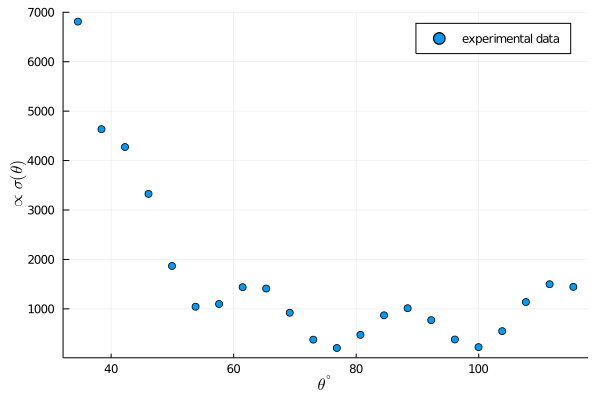

In [306]:
# C12-C12
plot_exp(12,12,[
1.047197551 0.5808838151
1.012290966 0.6374519615
0.9773843811 0.5098602854
0.9424777961 0.2582637344
0.907571211 0.1109302561
0.872664626 0.1951614961
0.837758041 0.4114603251
0.8028514559 0.5599732205
0.7679448709 0.4972189229
0.7330382858 0.2796048619
0.6981317008 0.1264682022
0.6632251158 0.2354616938
0.6283185307 0.5901754081
0.5934119457 0.9253151147
0.5585053606 0.9645625984
0.5235987756 0.751716583
0.4886921906 0.7274904984
0.4537856055 1.325636545
0.4188790205 2.398790189
0.3839724354 3.127686379
0.3490658504 3.437744819
0.3141592654 5.113107215
        ])

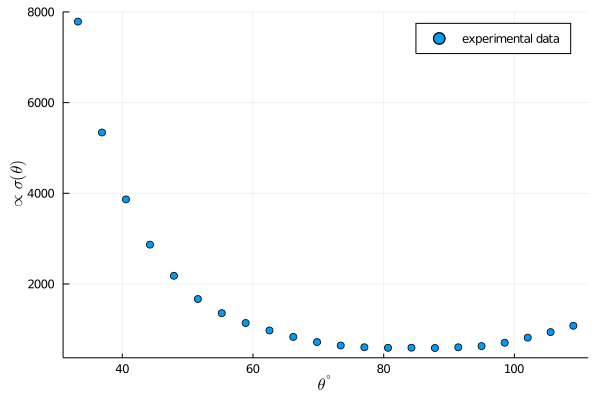

In [307]:
# C13-C12
plot_exp(13,12,[
1.047197551 0.4069840843
1.012290966 0.3735631768
0.9773843811 0.3416439215
0.9424777961 0.3084066194
0.907571211 0.2881894158
0.872664626 0.2875390035
0.837758041 0.2909731741
0.8028514559 0.3047947265
0.7679448709 0.314006087
0.7330382858 0.33022952
0.6981317008 0.3619554545
0.6632251158 0.4152153072
0.6283185307 0.4934732555
0.5934119457 0.5916372323
0.5585053606 0.7065792807
0.5235987756 0.8588748063
0.4886921906 1.076510404
0.4537856055 1.431988893
0.4188790205 1.912861742
0.3839724354 2.616668291
0.3490658504 3.663916736
0.3141592654 5.406006565
        ])

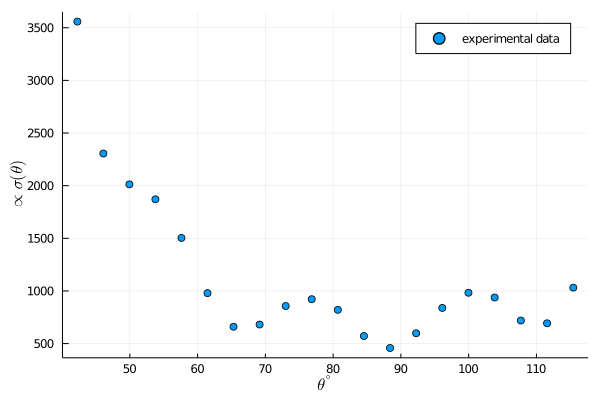

In [308]:
# C13-C13
plot_exp(13,13,[
1.047197551 0.4147439001
1.012290966 0.2946587328
0.9773843811 0.3222110426
0.9424777961 0.4409311746
0.907571211 0.48343233
0.872664626 0.43020388
0.837758041 0.3188005267
0.8028514559 0.2532579878
0.7679448709 0.3269397793
0.7330382858 0.4841933816
0.6981317008 0.5599789893
0.6632251158 0.5348889387
0.6283185307 0.4362571547
0.5934119457 0.4329878915
0.5585053606 0.6567429375
0.5235987756 1.028972368
0.4886921906 1.304639135
0.4537856055 1.428327501
0.4188790205 1.662593532
0.3839724354 2.604080717
        ])